<a href="https://colab.research.google.com/github/patcon/red-dwarf/blob/main/docs/example-usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet --no-cache-dir git+https://github.com/patcon/red-dwarf.git@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 168.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 197.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 187.4 MB/s eta 0:00:00


We're going to try to use this library to reproduce the visualization in this Polis report using matplotlib: https://pol.is/report/r8xhmkwp6shm9yfermteh

Note: This easy reproduction currently only works for conversations with the following features:

- < 100 participants
- no comments tags as metadata

<img src="https://imgur.com/0CGarhi.png" width="50%"/>

Included participant count: 36


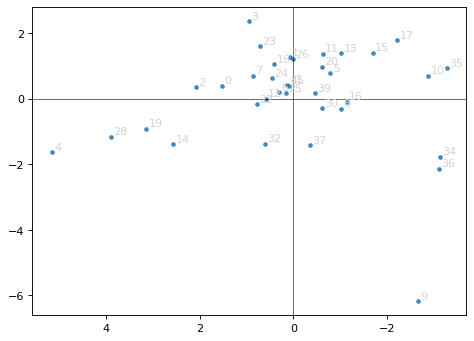

In [39]:
from reddwarf.polis_pandas import PolisClient

client = PolisClient()
client.load_data(report_id="r8xhmkwp6shm9yfermteh")
# Generate the raw vote matrix
client.get_matrix(is_filtered=True)
client.run_pca()
client.scale_projected_data()
included_participant_count = client.projected_data.shape[0]
print(f"Included participant count: {included_participant_count}")
client.generate_figure(coord_dataframe=client.projected_data)

This looks good and has the right amount of participants that matches the report page.

Let's see is clusters look right.

K=2, silhouette_K=0.5359866103230353
K=3, silhouette_K=0.4440101404241841
K=4, silhouette_K=0.4257846494168094
K=5, silhouette_K=0.33530109962552834
Optimal clusters for K=2
Plotting PCA embeddings with K-means, K=2


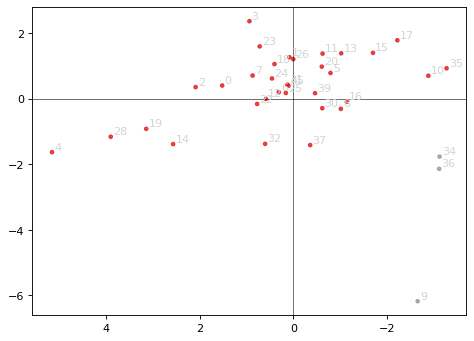

In [44]:
# This uses a random seed, and so will find slightly different things each time.
# Future iterations will need to seed cluster centers and do something that Polis platform calls "k-smoothing" to ensure matches.
client.find_optimal_k()